In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Image Denoising

There is a property of noise. Noise is generally considered to be a random variable with zero mean.

Consider a noisy pixel, $p=p0+n$ where $p0$ is the true value of pixel and $n$ is the noise in that pixel.
You can take large number of same pixels (say $N$) from different images and computes their average.

Ideally, you should get $p=p0$ since mean of noise is zero.

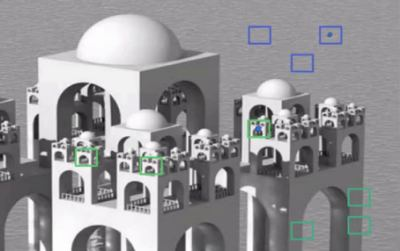

The blue patches in the image looks the similar. Green patches looks similar. So we take a pixel, take small window around it, search for similar windows in the image, average all the windows and replace the pixel with the result we got. 

This method is Non-Local Means Denoising

In [3]:
img = cv2.imread("./images/apple.jpg", cv2.IMREAD_UNCHANGED)

In [13]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [14]:
img_denoising = cv2.fastNlMeansDenoisingColored(img_rgb, None, 10, 10, 7, 21)

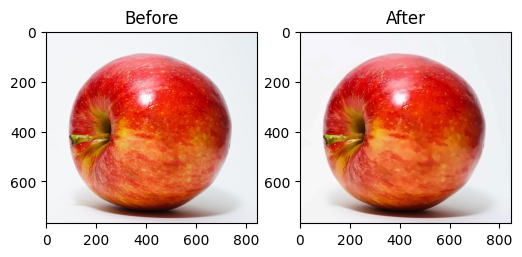

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(6, 6))

axes[0].imshow(img_rgb)
axes[0].set_title("Before")

axes[1].imshow(img_denoising)
axes[1].set_title("After")

plt.show()

### Image Inpainting

Image inpainting is a form of image conservation and image restoration

In [60]:
img_mask = cv2.imread("./images/apple-mask.png", cv2.IMREAD_UNCHANGED)

In [61]:
img_mask = cv2.cvtColor(img_mask, cv2.COLOR_BGR2RGB)

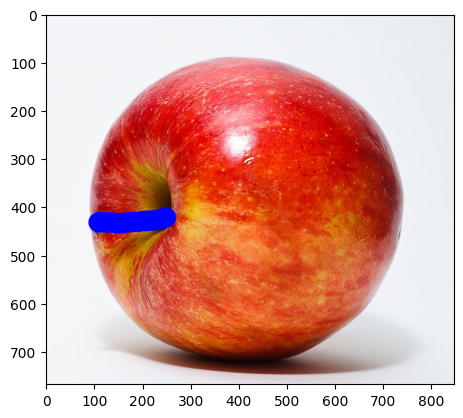

In [62]:
plt.imshow(img_mask)
plt.show()

In [63]:
lower_color = np.array([0, 0, 200])
upper_color = np.array([0, 0, 255])

In [64]:
mask = cv2.inRange(img_mask, lower_color, upper_color)

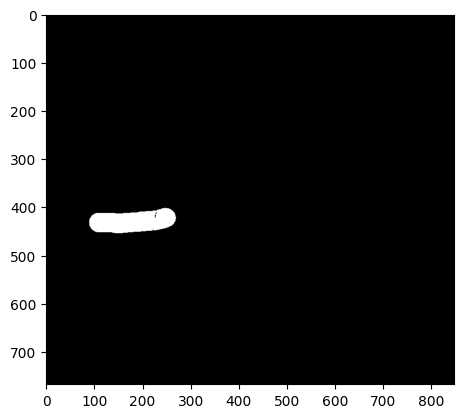

In [65]:
plt.imshow(mask, cmap="gray")
plt.show()

In [66]:
img_inpainting = cv2.inpaint(img_rgb, mask, 3, cv2.INPAINT_TELEA)

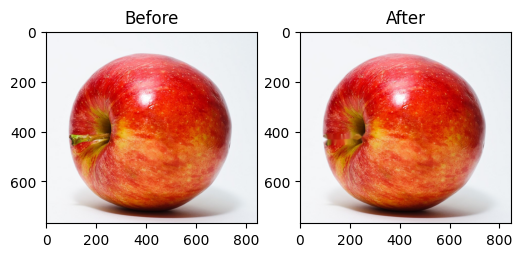

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(6, 6))

axes[0].imshow(img_rgb)
axes[0].set_title("Before")

axes[1].imshow(img_inpainting)
axes[1].set_title("After")

plt.show()

### High Dynamic Range (HDR)

High-dynamic-range imaging (HDRI or HDR) is a technique used in imaging and photography to reproduce a greater dynamic range of luminosity than is possible with standard digital imaging or photographic techniques

In [72]:
import glob

In [73]:
img_list = [cv2.cvtColor(cv2.imread(fn), cv2.COLOR_RGB2BGR) for fn in sorted(glob.glob("./images/hdr/*.jpg"))]

In [74]:
exposure_times = np.array([15.0, 2.5, 0.25, 0.0333], dtype=np.float32)

In [75]:
def generate_hdr(img_list, exposure_times, method="debevec"):
    if method == "debevec":
        cal_debevec = cv2.createCalibrateDebevec()
        merge_debevec = cv2.createMergeDebevec()
        tone_map = cv2.createTonemap(gamma=2.2)

        crf_debevec = cal_debevec.process(img_list, times=exposure_times)
        hdr_debevec = merge_debevec.process(img_list, times=exposure_times, response=crf_debevec)
        res = tone_map.process(hdr_debevec)
    elif method == "robertson":
        cal_robertson = cv2.createCalibrateRobertson()
        merge_robertson = cv2.createMergeRobertson()
        tone_map = cv2.createTonemap(gamma=2.2)
        
        crf_robertson = cal_robertson.process(img_list, times=exposure_times)
        hdr_robertson = merge_robertson.process(img_list, times=exposure_times, response=crf_robertson)
        res = tone_map.process(hdr_robertson)
    elif method == "mertens":
        merge_mertens = cv2.createMergeMertens()
        res = merge_mertens.process(img_list)

    img_hdr = np.clip(res * 255, 0, 255).astype('uint8')

    plt.imshow(img_hdr)
    plt.show()

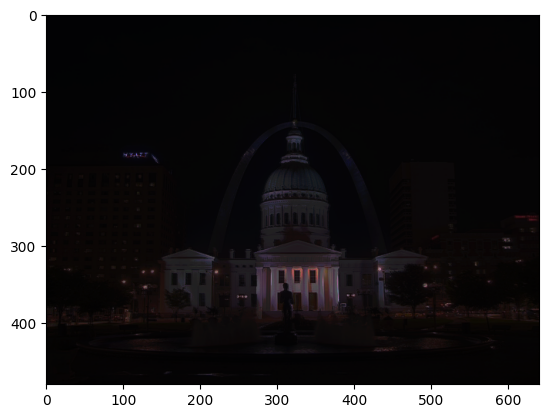

In [76]:
generate_hdr(img_list, exposure_times, method="debevec")

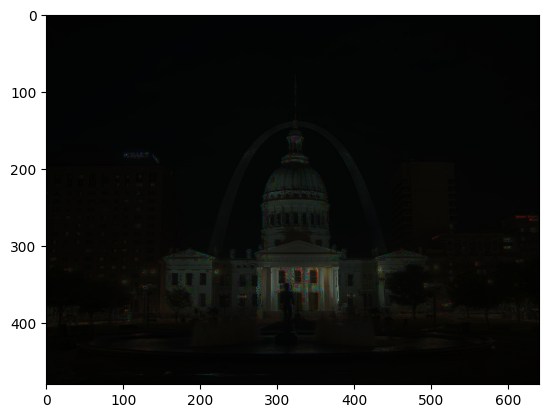

In [77]:
generate_hdr(img_list, exposure_times, method="robertson")

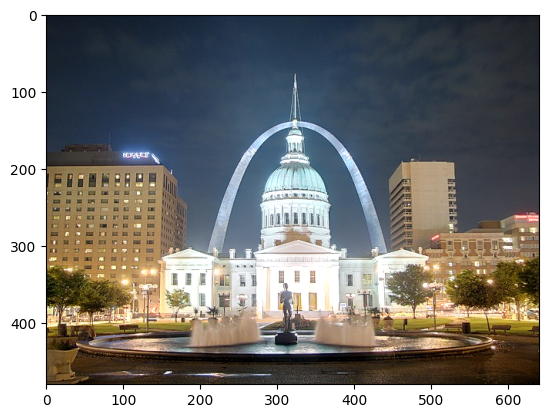

In [78]:
generate_hdr(img_list, exposure_times, method="mertens")

### References

- https://docs.opencv.org/4.x/d5/d69/tutorial_py_non_local_means.html
- https://docs.opencv.org/4.x/df/d3d/tutorial_py_inpainting.html
- https://docs.opencv.org/4.x/d2/df0/tutorial_py_hdr.html